<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Life-Expectancy-GDP" data-toc-modified-id="Life-Expectancy-GDP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Life Expectancy GDP</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Distplots" data-toc-modified-id="Distplots-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Distplots</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Violin-Plots" data-toc-modified-id="Violin-Plots-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Violin Plots</a></span></li><li><span><a href="#Swarm-Plots" data-toc-modified-id="Swarm-Plots-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Swarm Plots</a></span></li><li><span><a href="#Swarm-Plots-over-Violin-Plot" data-toc-modified-id="Swarm-Plots-over-Violin-Plot-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Swarm Plots over Violin Plot</a></span></li><li><span><a href="#Line-Plots" data-toc-modified-id="Line-Plots-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Line Plots</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Scatter Plots</a></span></li><li><span><a href="#Heat-Map" data-toc-modified-id="Heat-Map-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Heat Map</a></span></li></ul></li></ul></li></ul></div>

# Life Expectancy GDP 

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data 

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# Rename columns
df.columns = ['country', 'year', 'life_expectancy', 'GDP']

In [5]:
df.head()

,country,year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## EDA 

In [6]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
# Summary stats
df.describe()

,year,life_expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Distplots 

<Figure size 576x432 with 0 Axes>

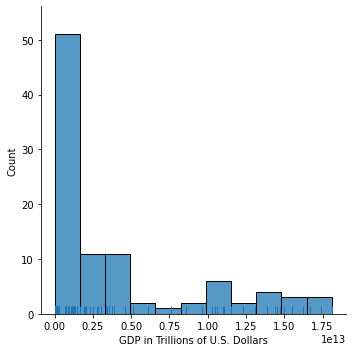

<Figure size 432x288 with 0 Axes>

In [8]:
# GDP displot
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

<Figure size 576x432 with 0 Axes>

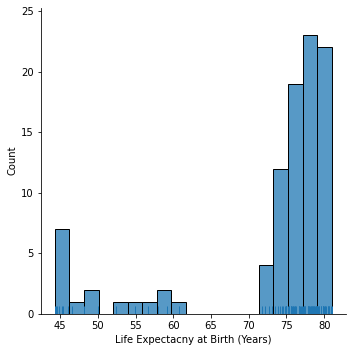

<Figure size 432x288 with 0 Axes>

In [9]:
# Life Expectancy at Birth displot
plt.figure(figsize=(8,6))
sns.displot(df.life_expectancy, rug = True, kde=False)
plt.xlabel("Life Expectacny at Birth (Years)")
plt.show()
plt.clf()

### Bar Charts 

In [10]:
# Breaking up the data by country
dfMeans = df.drop("year", axis = 1).groupby("country").mean().reset_index()
dfMeans

,country,life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


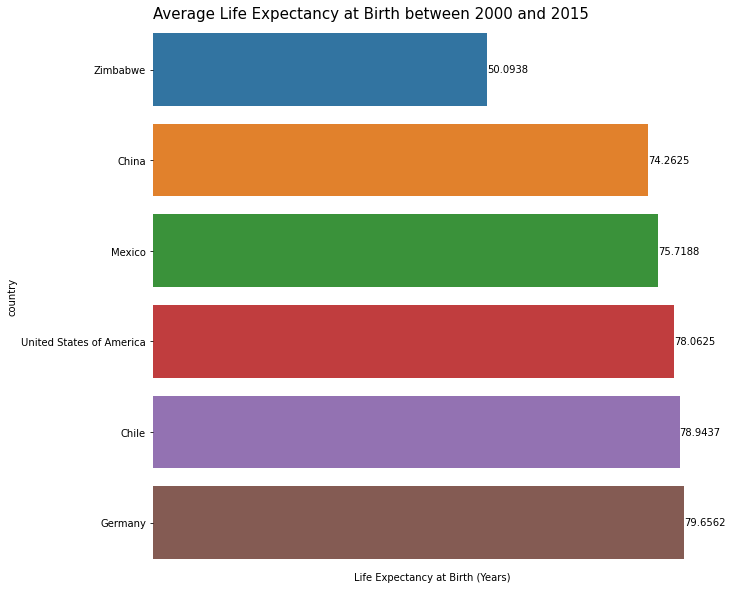

<Figure size 432x288 with 0 Axes>

In [11]:
# Bar chart showing average life_expectancy by country
plt.figure(figsize=(10,10))
ax = sns.barplot(x ='life_expectancy',y = 'country',data=dfMeans,order=dfMeans.sort_values('life_expectancy').country)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.title('Average Life Expectancy at Birth between 2000 and 2015',loc='left',size=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()
plt.clf()

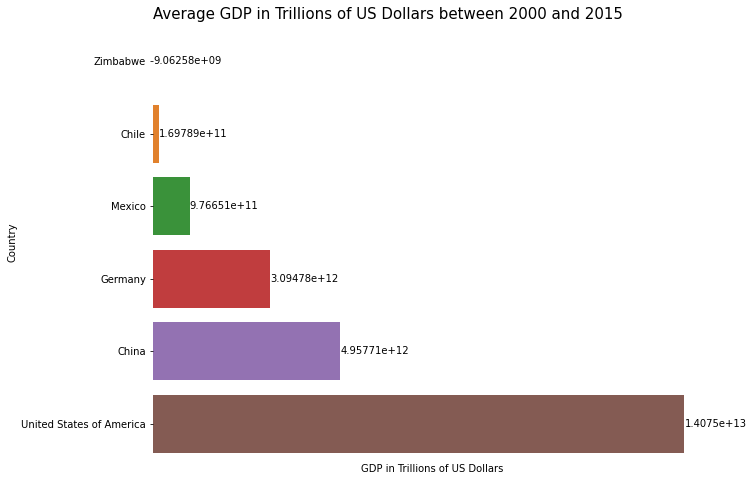

<Figure size 432x288 with 0 Axes>

In [12]:
# Barplot showing average GDP by country
plt.figure(figsize=(10,8))
ax = sns.barplot(x='GDP',y='country',data=dfMeans,order=dfMeans.sort_values('GDP').country)
plt.xlabel('GDP in Trillions of US Dollars')
plt.ylabel('Country')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Average GDP in Trillions of US Dollars between 2000 and 2015',loc='left',size=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels([])
plt.show()
plt.clf()

### Violin Plots

In [ ]:
# Violin plots for average GDP and Life Expectancy at Birth
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.life_expectancy, y=df.country)
axes[1].set_xlabel("Life expectancy at birth (years)")
plt.show()

### Swarm Plots 

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.life_expectancy, y=df.country)
axes[1].set_xlabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

### Swarm Plots over Violin Plot

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.country)
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.country,color='black')
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.life_expectancy, y=df.country)
axes[1] = sns.violinplot(ax=axes[1], x=df.life_expectancy, y=df.country,color='black')
axes[1].set_xlabel("Life expectancy at birth (years)");

### Line Plots

In [ ]:
life_exp = list(df.life_expectancy)

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x=df.year,y=df.life_expectancy,hue=df.country,marker="o")
plt.xlabel('Year',size=12)
plt.ylabel('Life Expectancy at Birth',size=12)
plt.title('Life Expectancy at Birth has increased for all countries over this 15 year period',size=15,loc='left')
plt.legend(prop={'size': 12})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.clf()

In [ ]:
plt.figure(figsize=(16,8))
graphLEABY = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"year","life_expectancy",marker="o")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

### Scatter Plots

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df.life_expectancy,y=df.GDP,hue=df.country)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Life Expectancy at Birth vs GDP',size=16)
plt.xlabel('Life Expectancy at Birth',size=12)
plt.ylabel('GDP in Trillions of Dollars',size=12)
plt.show()
plt.clf()


In [ ]:
scatter = sns.FacetGrid(df,col="country",col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
scatter = (scatter.map(sns.scatterplot,"life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


### Heat Map 

In [ ]:
# For GDP
pivot = df.pivot("country", "year", "GDP")
ax = sns.heatmap(pivot)